## Step 1: Importing Important Libraries and Loading the Data Sets

In [197]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score
from IPython.display import Image
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings('ignore')

In [198]:
# Loading the Data Sets
news_train = pd.read_csv("train.csv")
news_test = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")
sample = pd.read_csv("sample.csv")

In [199]:
# Predicting the shapes of the above data sets in their respective
# order
print(news_train.shape)
print(news_test.shape)
print(data_dict.shape)
print(sample.shape)


(29733, 61)
(9911, 60)
(61, 3)
(9911, 2)


In [200]:
# Looking at the news_train data set
news_train.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [201]:
# looking at the news_test data set
news_test.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


The above data set 'news_test' DOES NOT have the 'shares' column

In [202]:
# Looking at the data_dict data set
data_dict.head(61)

,Unnamed: 0,column,description
0,0,url,URL of the article (non-predictive)
1,1,timedelta,Days between the article publication and the d...
2,2,ntokenstitle,Number of words in the title
3,3,ntokenscontent,Number of words in the content
4,4,nuniquetokens,Rate of unique words in the content
5,5,nnonstop_words,Rate of non-stop words in the content
6,6,nnonstopuniquetokens,Rate of unique non-stop words in the content
7,7,num_hrefs,Number of links
8,8,numselfhrefs,Number of links to other articles published by...
9,9,num_imgs,Number of images


In [203]:
for i in data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

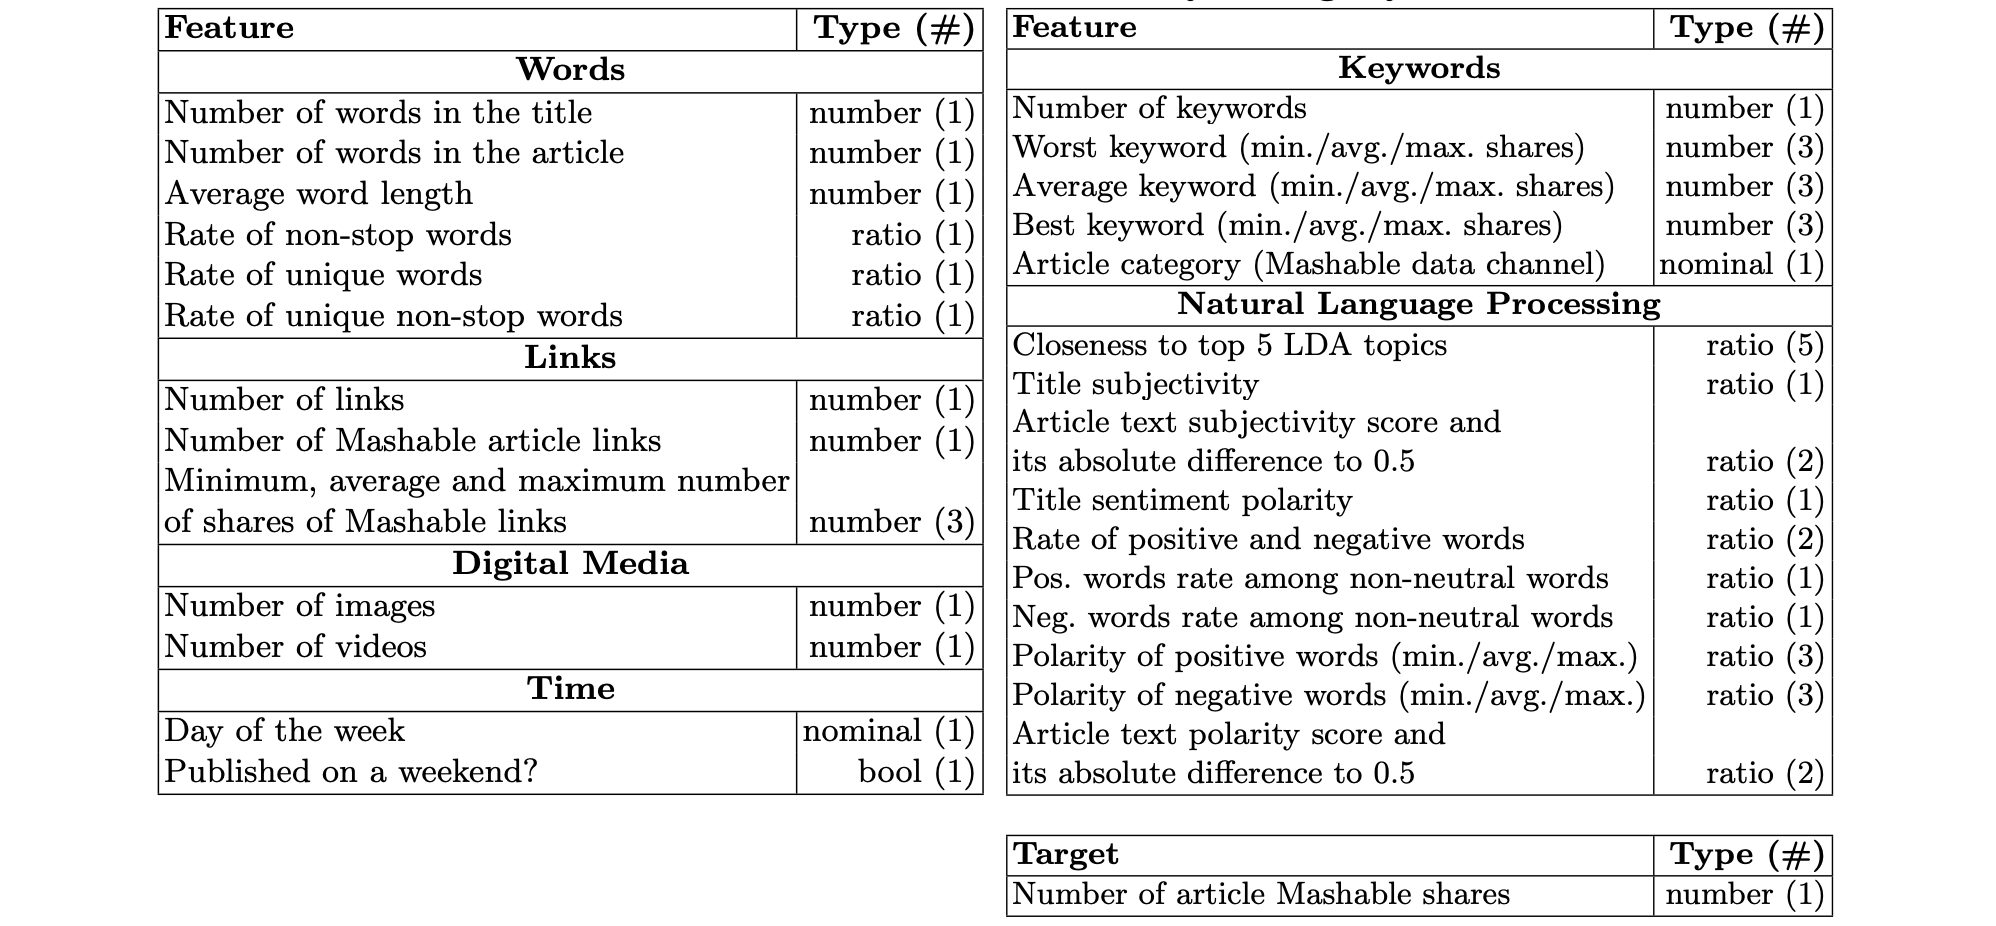

In [204]:
# Displaying Features in the form of an Image
Image('features.png')

In [205]:
# Creating different lists for different types of features 
# for more readability
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 
                     'weekday_is_tuesday', 
                     'weekday_is_wednesday',
                     'weekday_is_thursday',
                     'weekday_is_friday',
                     'weekday_is_saturday',
                     'weekday_is_sunday',
                     'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

ids = ['id']

others = ['url']

target = ['shares']

In [206]:
features = [*ids, *word_features, *media_features, 
            *temporal_features, *channel_features, 
            *keyword_features, *reference_features, 
            *topic_features, *subjectivity_features, 
            *sentiment_features, *others, *target]

len(features), len(news_train.columns)

(61, 61)

## Step 2 : Creating X and y and then Train Test Split

In [207]:
select_features = [*ids, *word_features, *media_features, 
            *temporal_features, *channel_features, 
            *keyword_features, *reference_features, 
            *topic_features, *subjectivity_features, 
            *sentiment_features]

In [208]:
# selecting features except the target column 'shares'
# and non-predictive column 'url'
select_features

['id',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'average_token_length',
 'num_imgs',
 'num_videos',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'num_keywords',
 'num_hrefs',
 'num_self_hrefs',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'title_subjectivity',
 'abs_title_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negativ

In [209]:
X = news_train[select_features].set_index('id')
y = news_train[target]

In [210]:
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords,num_hrefs,num_self_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,title_subjectivity,abs_title_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.0,211.0,0.629808,1.0,0.800000,4.606635,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,8.0,6.0,3.0,2000.0,2000.0,2000.00,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,1.000000,0.500000,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,0.600000,0.600000
1,12.0,416.0,0.603535,1.0,0.663580,5.004808,1.0,16.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,7.0,22.0,7.0,658.0,13700.0,4477.25,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.000000,0.500000,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000
2,7.0,229.0,0.638393,1.0,0.746479,4.829694,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,8.0,9.0,4.0,4800.0,NaN,4800.00,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.000000,0.500000,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000
3,9.0,473.0,0.542373,1.0,0.752809,4.634249,1.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,7.0,7.0,0.0,0.0,0.0,0.00,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.000000,0.500000,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000
4,13.0,1097.0,0.505213,1.0,0.676343,4.678213,14.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,4.0,10.0,4.0,1400.0,2300.0,2000.00,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.383333,0.116667,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.166667,0.166667


In [211]:
X.shape

(29733, 58)

In [212]:
# Checking categorical values
news_categorical = X.select_dtypes(include=['object'])
news_categorical.head()

""
id
0
1
2
3
4


In [213]:
y.head()

,shares
0,36700
1,24200
2,945
3,844
4,551


In [214]:
y.shape

(29733, 1)

In [215]:
# Doing the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)

[i.shape for i in [X_train, X_test, y_train, y_test]]

[(20813, 58), (8920, 58), (20813, 1), (8920, 1)]

## Step 3 : Data Understanding

In [216]:
X_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords,num_hrefs,num_self_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,title_subjectivity,abs_title_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4585,9.0,168.0,0.677019,1.0,0.808081,4.696429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,864.0,242.166667,864.0,690400.0,247677.333333,864.000000,4261.000000,2599.511616,6.0,7.0,4.0,2300.0,4200.0,3250.0,0.356856,0.368348,0.033336,0.033338,0.208123,0.512500,0.000000,0.500000,0.200833,0.023810,0.011905,0.666667,0.333333,0.533333,NaN,1.00,-0.112500,-0.125,-0.10,0.000000,0.000000
13413,9.0,1128.0,0.421429,1.0,0.618827,4.817376,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,388.0,96.250000,0.0,843300.0,316040.000000,0.000000,3443.263725,1908.333435,5.0,8.0,2.0,740.0,740.0,740.0,0.640232,0.239765,0.040002,0.040001,0.040001,0.401870,0.254167,0.245833,0.156953,0.057624,0.010638,0.844156,0.155844,0.331831,0.033333,1.00,-0.249653,-1.000,-0.10,0.037500,0.037500
9073,14.0,200.0,0.641304,1.0,0.744000,4.490000,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,851.0,210.353333,2000.0,843300.0,340300.000000,1425.500000,7417.360197,4446.176608,9.0,4.0,2.0,6300.0,64500.0,35400.0,0.022222,0.216540,0.022222,0.716793,0.022222,0.525000,0.375000,0.125000,0.306944,NaN,0.000000,1.000000,0.000000,0.420370,0.083333,0.90,0.000000,0.000,0.00,0.550000,0.550000
28754,11.0,1348.0,0.423369,1.0,0.620335,4.410237,1.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,506.0,150.500000,22300.0,843300.0,210800.000000,2740.606557,3812.722222,3311.893862,6.0,13.0,6.0,4200.0,4200.0,4200.0,0.497182,0.035012,0.033423,0.401017,0.033366,0.436517,0.454545,0.045455,0.139249,0.046736,0.010386,0.818182,0.181818,0.314128,0.033333,0.75,-0.253458,NaN,-0.05,0.136364,0.136364
21620,11.0,223.0,0.565022,1.0,0.707692,4.964126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,217.0,998.0,484.600000,0.0,51900.0,15628.571429,0.000000,2666.619048,NaN,7.0,5.0,3.0,2100.0,2400.0,2250.0,0.152471,0.029068,0.361580,0.428291,0.028590,0.333333,0.000000,0.500000,0.150000,0.026906,0.004484,0.857143,0.142857,0.450000,0.100000,1.00,-0.750000,-0.750,-0.75,0.000000,0.000000


In [217]:
# Information for the X_train data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20813 entries, 4585 to 23654
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 20813 non-null  float64
 1   n_tokens_content               20813 non-null  float64
 2   n_unique_tokens                20813 non-null  float64
 3   n_non_stop_words               20813 non-null  float64
 4   n_non_stop_unique_tokens       20813 non-null  float64
 5   average_token_length           20813 non-null  float64
 6   num_imgs                       17057 non-null  float64
 7   num_videos                     20403 non-null  float64
 8   weekday_is_monday              20108 non-null  float64
 9   weekday_is_tuesday             20290 non-null  float64
 10  weekday_is_wednesday           19746 non-null  float64
 11  weekday_is_thursday            20602 non-null  float64
 12  weekday_is_friday              20219 non-nu

In [218]:
# giving a statistical description of X_train
X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords,num_hrefs,num_self_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,title_subjectivity,abs_title_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_sentiment_polarity
count,20813.000000,20813.000000,20813.000000,20813.000000,20813.000000,20813.000000,17057.000000,20403.000000,20108.000000,20290.000000,19746.000000,20602.000000,20219.000000,20759.000000,19813.000000,19293.000000,20813.000000,20813.000000,20813.000000,20813.000000,20813.000000,20813.000000,20066.000000,20491.00000,20754.000000,20728.000000,19721.000000,20730.000000,20610.000000,20340.000000,20139.000000,20487.000000,20255.000000,17652.000000,20619.000000,19583.000000,20590.000000,20813.000000,20813.000000,20813.000000,20813.000000,20813.000000,19229.000000,20719.000000,20241.000000,20549.000000,20233.000000,20184.000000,20399.000000,20394.000000,19968.000000,20492.000000,20711.000000,20694.000000,20254.000000,20321.000000,20612.000000,19773.000000
mean,10.397540,544.774996,0.564662,1.019651,0.704479,4.544502,4.480272,1.287654,0.167396,0.186939,0.189051,0.184060,0.143232,0.061853,0.066926,0.128596,0.053861,0.174458,0.159275,0.059770,0.184692,0.211262,26.145171,1171.29211,314.644488,13422.924981,752758.450383,259257.342215,1119.538117,5707.362192,3147.016424,7.211744,10.883683,3.277759,4029.497811,10567.239953,6523.938803,0.186103,0.139960,0.215268,0.223950,0.234672,0.443263,0.281147,0.343154,0.119319,0.039577,0.016528,0.682622,0.287117,0.353388,0.095655,0.755395,-0.259158,-0.520412,-0.107174,0.072294,0.155489
std,2.122574,469.681512,4.857308,7.218032,4.503514,0.851096,8.196782,4.243673,0.373338,0.389872,0.391559,0.387542,0.350318,0.240894,0.249900,0.334761,0.225748,0.379512,0.365942,0.237067,0.388057,0.408214,69.667283,3956.23446,622.305174,56771.876773,214044.779522,135003.559667,1136.034791,6206.356230,1324.343840,1.912611,11.457035,3.823459,18532.704811,41142.400982,23606.513132,0.264336,0.217888,0.281496,0.294790,0.289307,0.117199,0.324308,0.188504,0.096940,0.017399,0.010806,0.191033,0.156220,0.105254,0.072487,0.248202,0.127874,0.290914,0.094785,0.265388,0.226919
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.000000,245.000000,0.471591,1.000000,0.627087,4.476821,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,447.00000,142.228437,0.000000,843300.000000,172408.333333,0.000000,3569.217787,2389.355423,6.000000,4.000000,1.000000,636.000000,1100.000000,983.000000,0.025069,0.025013,0.028572,0.028572,0.028574,0.395830,0.000000,0.166667,0.058179,0.028351,0.009585,0.600000,0.185185,0.305632,0.050000,0.600000,-0.329077,-0.700000

Looking at the description of X_train, there seems to be missing values for some features. So, let's analyze and fix it.

## Step 4 : Data Cleaning

In [219]:
# Checking datatype of each variable from 'X_train' data set
X_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20813 entries, 4585 to 23654
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 20813 non-null  float64
 1   n_tokens_content               20813 non-null  float64
 2   n_unique_tokens                20813 non-null  float64
 3   n_non_stop_words               20813 non-null  float64
 4   n_non_stop_unique_tokens       20813 non-null  float64
 5   average_token_length           20813 non-null  float64
 6   num_imgs                       17057 non-null  float64
 7   num_videos                     20403 non-null  float64
 8   weekday_is_monday              20108 non-null  float64
 9   weekday_is_tuesday             20290 non-null  float64
 10  weekday_is_wednesday           19746 non-null  float64
 11  weekday_is_thursday            20602 non-null  float64
 12  weekday_is_friday              20219 non-nu

In [220]:
# Now checking if there are columns with one unique value 
X_train.nunique(dropna=True)

n_tokens_title                      19
n_tokens_content                  2046
n_unique_tokens                  16326
n_non_stop_words                  1320
n_non_stop_unique_tokens         14426
average_token_length             17269
num_imgs                            78
num_videos                          51
weekday_is_monday                    2
weekday_is_tuesday                   2
weekday_is_wednesday                 2
weekday_is_thursday                  2
weekday_is_friday                    2
weekday_is_saturday                  2
weekday_is_sunday                    2
is_weekend                           2
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          17
kw_max_min                        1011
kw_avg_min                       11467
kw_min_max               

#### from the above, we can observe that we don't have any columns with a unique value, so we don't have to do anything here.

<AxesSubplot:>

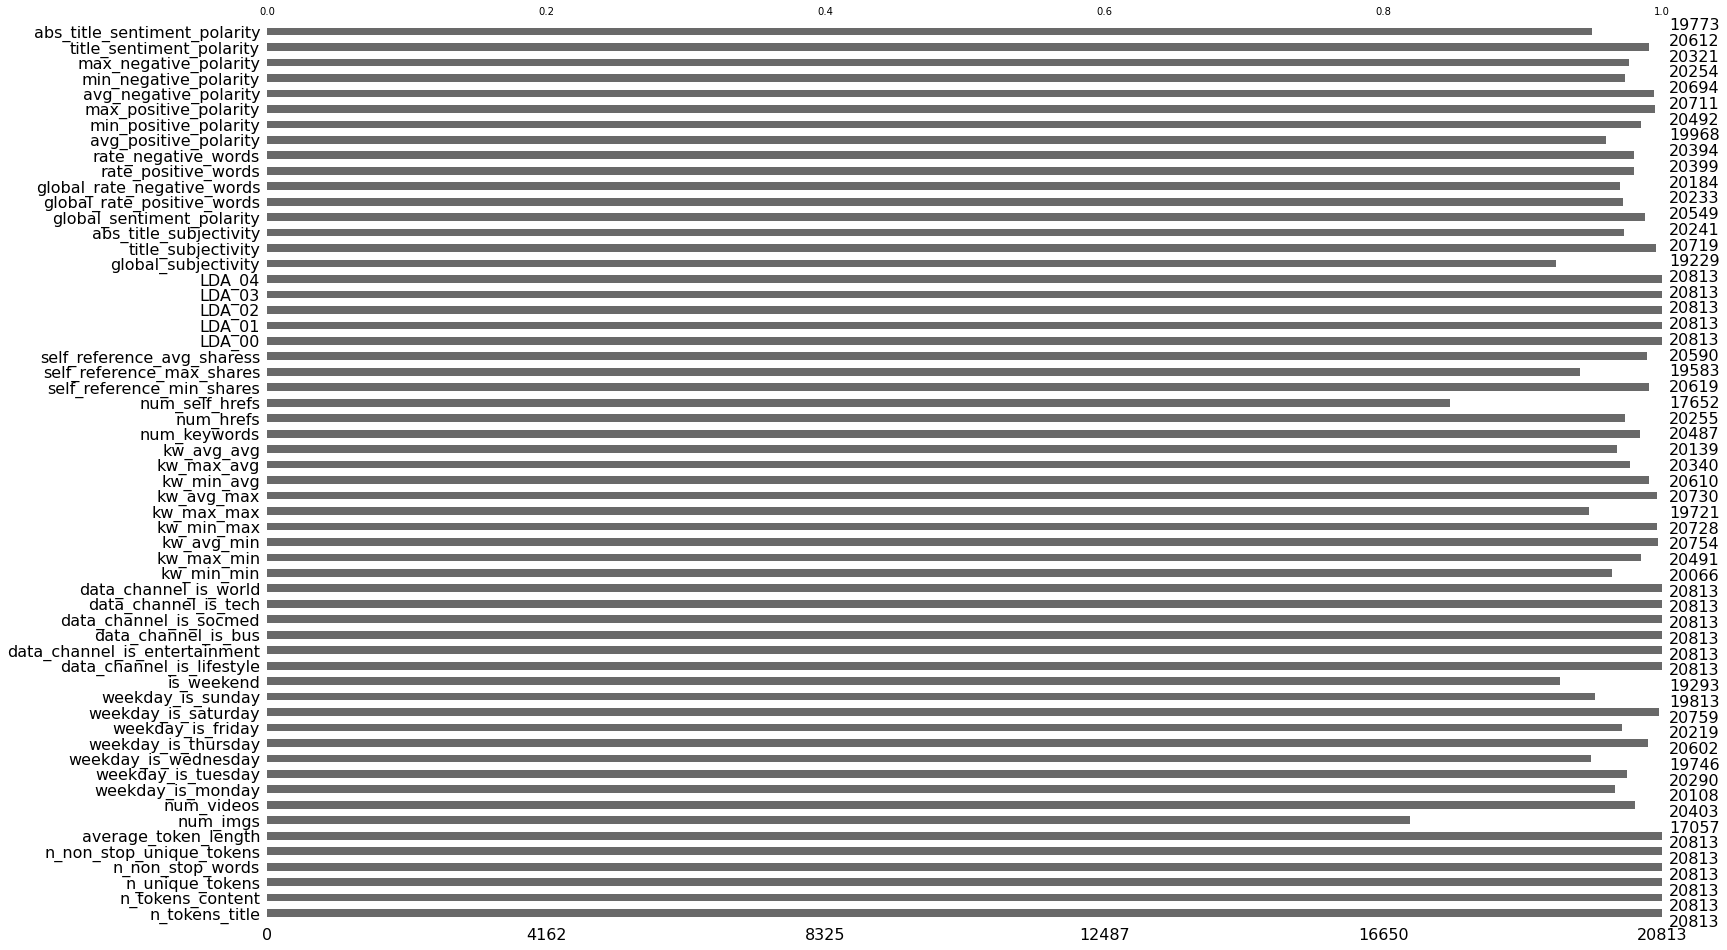

In [221]:
# Now Checking the missing data in a Visual Manner
msno.bar(X_train)

In [222]:
# Checking the Number of Missing Values for 'X_train' data set
missing_values_perc = round(100*(X_train.isnull().sum()/len(X_train.index)),2)
missing_values_perc

n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
average_token_length              0.00
num_imgs                         18.05
num_videos                        1.97
weekday_is_monday                 3.39
weekday_is_tuesday                2.51
weekday_is_wednesday              5.13
weekday_is_thursday               1.01
weekday_is_friday                 2.85
weekday_is_saturday               0.26
weekday_is_sunday                 4.80
is_weekend                        7.30
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.59
kw_max_min                        1.55
kw_avg_min                        0.28
kw_min_max               

In [223]:
# Now Checking the null values of 'X_train' in descending order
X_train.isnull().sum().sort_values(ascending=False)

num_imgs                         3756
num_self_hrefs                   3161
global_subjectivity              1584
is_weekend                       1520
self_reference_max_shares        1230
kw_max_max                       1092
weekday_is_wednesday             1067
abs_title_sentiment_polarity     1040
weekday_is_sunday                1000
avg_positive_polarity             845
kw_min_min                        747
weekday_is_monday                 705
kw_avg_avg                        674
global_rate_negative_words        629
weekday_is_friday                 594
global_rate_positive_words        580
abs_title_subjectivity            572
min_negative_polarity             559
num_hrefs                         558
weekday_is_tuesday                523
max_negative_polarity             492
kw_max_avg                        473
rate_negative_words               419
rate_positive_words               414
num_videos                        410
num_keywords                      326
kw_max_min  

In [224]:
# Impute the missing values with constant 0
impu_features = missing_values_perc[missing_values_perc.gt(0)].index
impu_features

Index(['num_imgs', 'num_videos', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'num_keywords', 'num_hrefs',
       'num_self_hrefs', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity',
       'title_sentiment_polarity', 'abs_title_sentiment_polarity'],
      dtype='object')

In [225]:
impute = SimpleImputer(strategy='constant',fill_value=0)
X_train[impu_features] = impute.fit_transform(X_train[impu_features])


<AxesSubplot:>

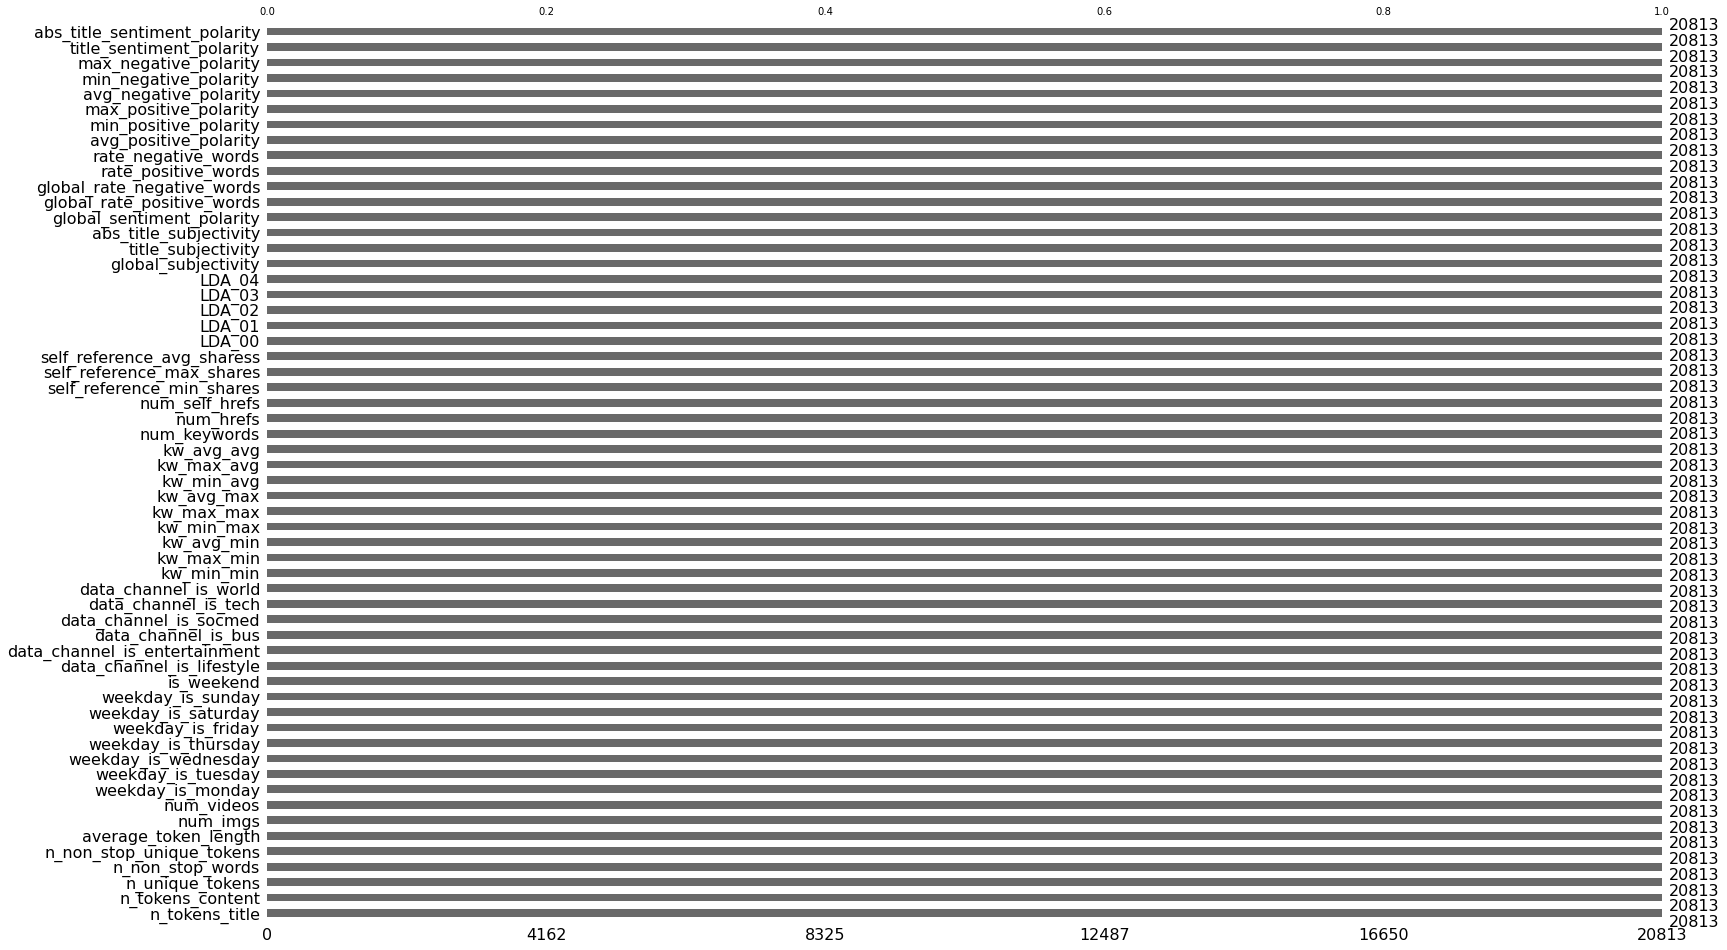

In [226]:
# Checkin the bar plot again for missing values
msno.bar(X_train)

In [227]:
# Checking the Number of Missing Values for 'X_train' data set
missing_values_perc = round(100*(X_train.isnull().sum()/len(X_train.index)),2)
missing_values_perc

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
average_token_length             0.0
num_imgs                         0.0
num_videos                       0.0
weekday_is_monday                0.0
weekday_is_tuesday               0.0
weekday_is_wednesday             0.0
weekday_is_thursday              0.0
weekday_is_friday                0.0
weekday_is_saturday              0.0
weekday_is_sunday                0.0
is_weekend                       0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
k

In [228]:
# Imputing the missing values in the 'X_train' data set with median
#imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
#X_train_1 = pd.DataFrame(imp_median.fit_transform(X_train),columns=X_train.columns)
#X_train_1

In [229]:
# Checking datatype of each variable from 'X_test' data set
X_test.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8920 entries, 17455 to 16437
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 8920 non-null   float64
 1   n_tokens_content               8920 non-null   float64
 2   n_unique_tokens                8920 non-null   float64
 3   n_non_stop_words               8920 non-null   float64
 4   n_non_stop_unique_tokens       8920 non-null   float64
 5   average_token_length           8920 non-null   float64
 6   num_imgs                       7269 non-null   float64
 7   num_videos                     8743 non-null   float64
 8   weekday_is_monday              8644 non-null   float64
 9   weekday_is_tuesday             8690 non-null   float64
 10  weekday_is_wednesday           8433 non-null   float64
 11  weekday_is_thursday            8832 non-null   float64
 12  weekday_is_friday              8648 non-nul

In [230]:
# Now checking if there are columns with one unique value 
X_test.nunique(dropna=True)

n_tokens_title                     19
n_tokens_content                 1645
n_unique_tokens                  7795
n_non_stop_words                 1103
n_non_stop_unique_tokens         7298
average_token_length             7953
num_imgs                           75
num_videos                         37
weekday_is_monday                   2
weekday_is_tuesday                  2
weekday_is_wednesday                2
weekday_is_thursday                 2
weekday_is_friday                   2
weekday_is_saturday                 2
weekday_is_sunday                   2
is_weekend                          2
data_channel_is_lifestyle           2
data_channel_is_entertainment       2
data_channel_is_bus                 2
data_channel_is_socmed              2
data_channel_is_tech                2
data_channel_is_world               2
kw_min_min                         11
kw_max_min                        888
kw_avg_min                       6330
kw_min_max                        651
kw_max_max  

<AxesSubplot:>

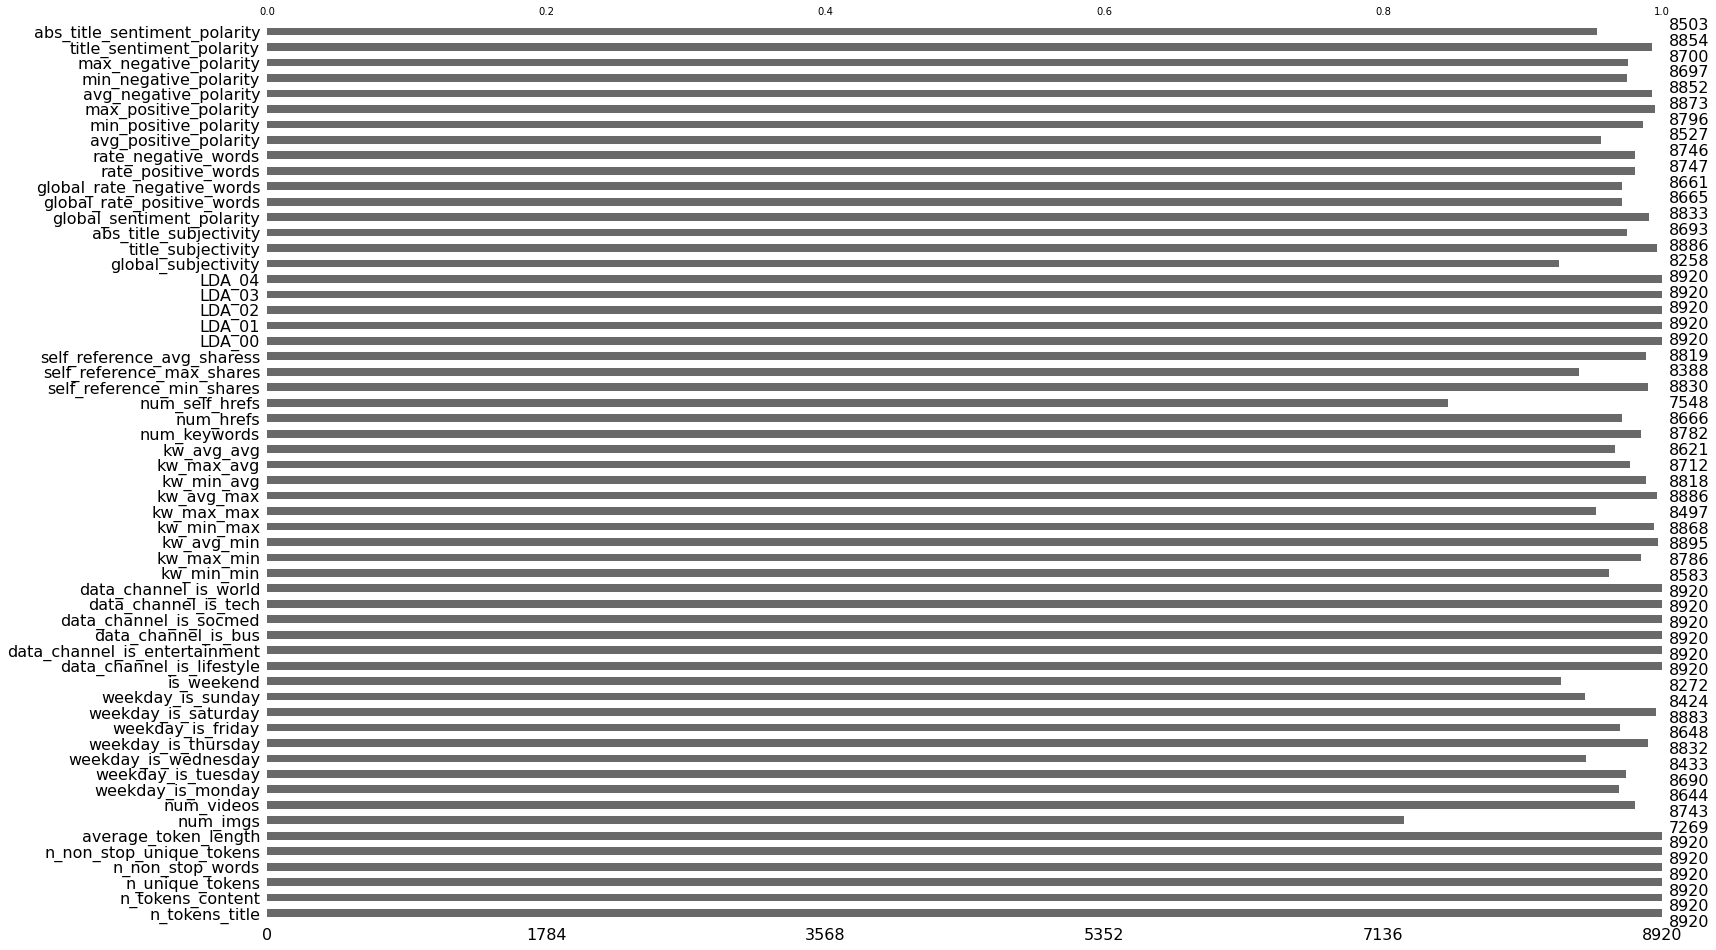

In [231]:
# Now Checking the missing data in a Visual Manner
msno.bar(X_test)

In [232]:
# Checking the Number of Missing Values for 'X_test' data set
missing_values_perc = round(100*(X_test.isnull().sum()/len(X_test.index)),2)
missing_values_perc

n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
average_token_length              0.00
num_imgs                         18.51
num_videos                        1.98
weekday_is_monday                 3.09
weekday_is_tuesday                2.58
weekday_is_wednesday              5.46
weekday_is_thursday               0.99
weekday_is_friday                 3.05
weekday_is_saturday               0.41
weekday_is_sunday                 5.56
is_weekend                        7.26
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.78
kw_max_min                        1.50
kw_avg_min                        0.28
kw_min_max               

In [233]:
# Now Checking the null values of 'X_test' in descending order
X_test.isnull().sum().sort_values(ascending=False)

num_imgs                         1651
num_self_hrefs                   1372
global_subjectivity               662
is_weekend                        648
self_reference_max_shares         532
weekday_is_sunday                 496
weekday_is_wednesday              487
kw_max_max                        423
abs_title_sentiment_polarity      417
avg_positive_polarity             393
kw_min_min                        337
kw_avg_avg                        299
weekday_is_monday                 276
weekday_is_friday                 272
global_rate_negative_words        259
global_rate_positive_words        255
num_hrefs                         254
weekday_is_tuesday                230
abs_title_subjectivity            227
min_negative_polarity             223
max_negative_polarity             220
kw_max_avg                        208
num_videos                        177
rate_negative_words               174
rate_positive_words               173
num_keywords                      138
kw_max_min  

In [234]:
# Impute the missing values for X_test with constant 0
impute = SimpleImputer(strategy='constant',fill_value=0)
X_test[impu_features] = impute.fit_transform(X_test[impu_features])


<AxesSubplot:>

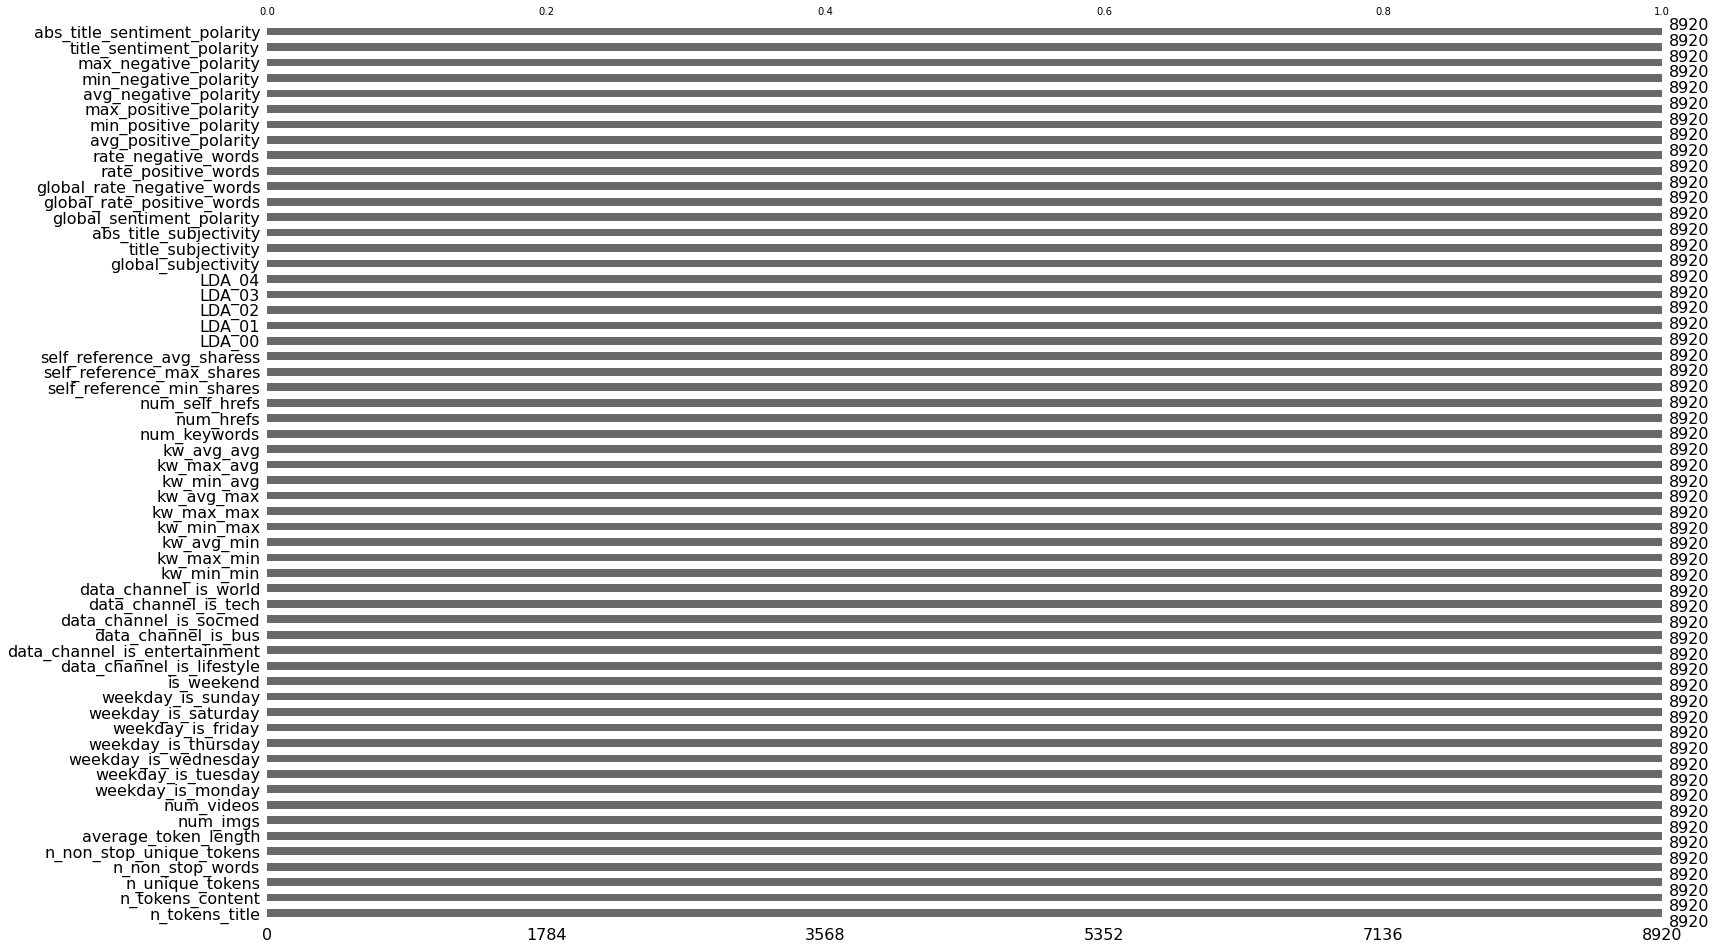

In [235]:
# Bar plot for Missing values in X_test
msno.bar(X_test)

In [236]:
# Imputing the missing values in the 'X_test' data set with median
#imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
#X_test_1 = pd.DataFrame(imp_median.fit_transform(X_test),columns=X_test.columns)
#X_test_1

In [237]:
# Checking the null values again for X_test
round(100*(X_test.isnull().sum()/len(X_test.index)),2)

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
average_token_length             0.0
num_imgs                         0.0
num_videos                       0.0
weekday_is_monday                0.0
weekday_is_tuesday               0.0
weekday_is_wednesday             0.0
weekday_is_thursday              0.0
weekday_is_friday                0.0
weekday_is_saturday              0.0
weekday_is_sunday                0.0
is_weekend                       0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
k

In [238]:
# Checking the null values again for X_train
round(100*(X_train.isnull().sum()/len(X_train.index)),2)

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
average_token_length             0.0
num_imgs                         0.0
num_videos                       0.0
weekday_is_monday                0.0
weekday_is_tuesday               0.0
weekday_is_wednesday             0.0
weekday_is_thursday              0.0
weekday_is_friday                0.0
weekday_is_saturday              0.0
weekday_is_sunday                0.0
is_weekend                       0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
k

### Now we can see that there are no NULL values since we have cleaned our data properly. Now we can proceed with EDA Analysis.

## Step 5: EDA Analysis AND PreProcessing

Let's start by getting the univariate distributions of each feature.

<AxesSubplot:>

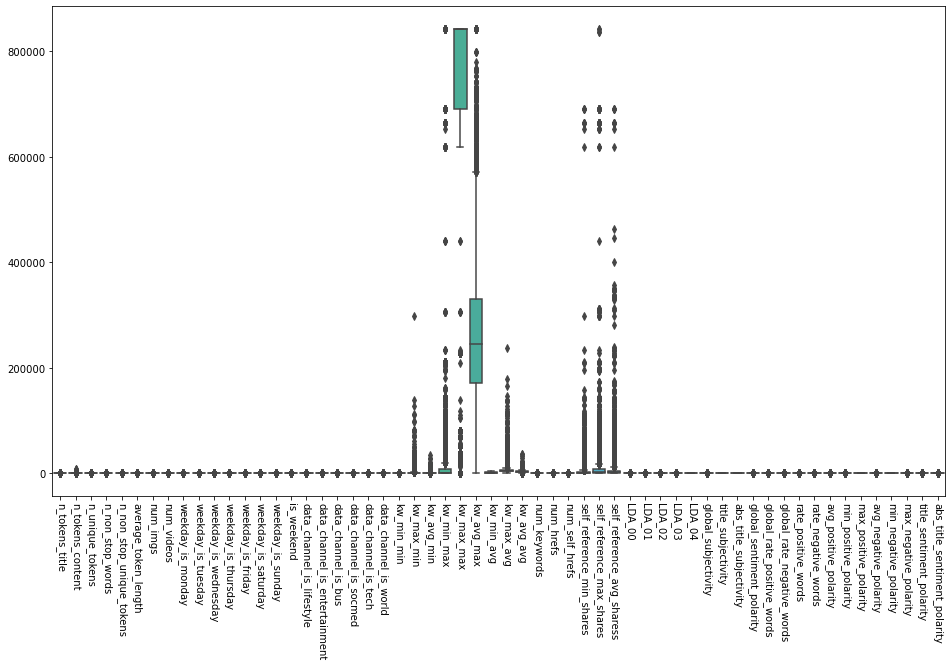

In [239]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=270)
sns.boxplot(data = X_train)

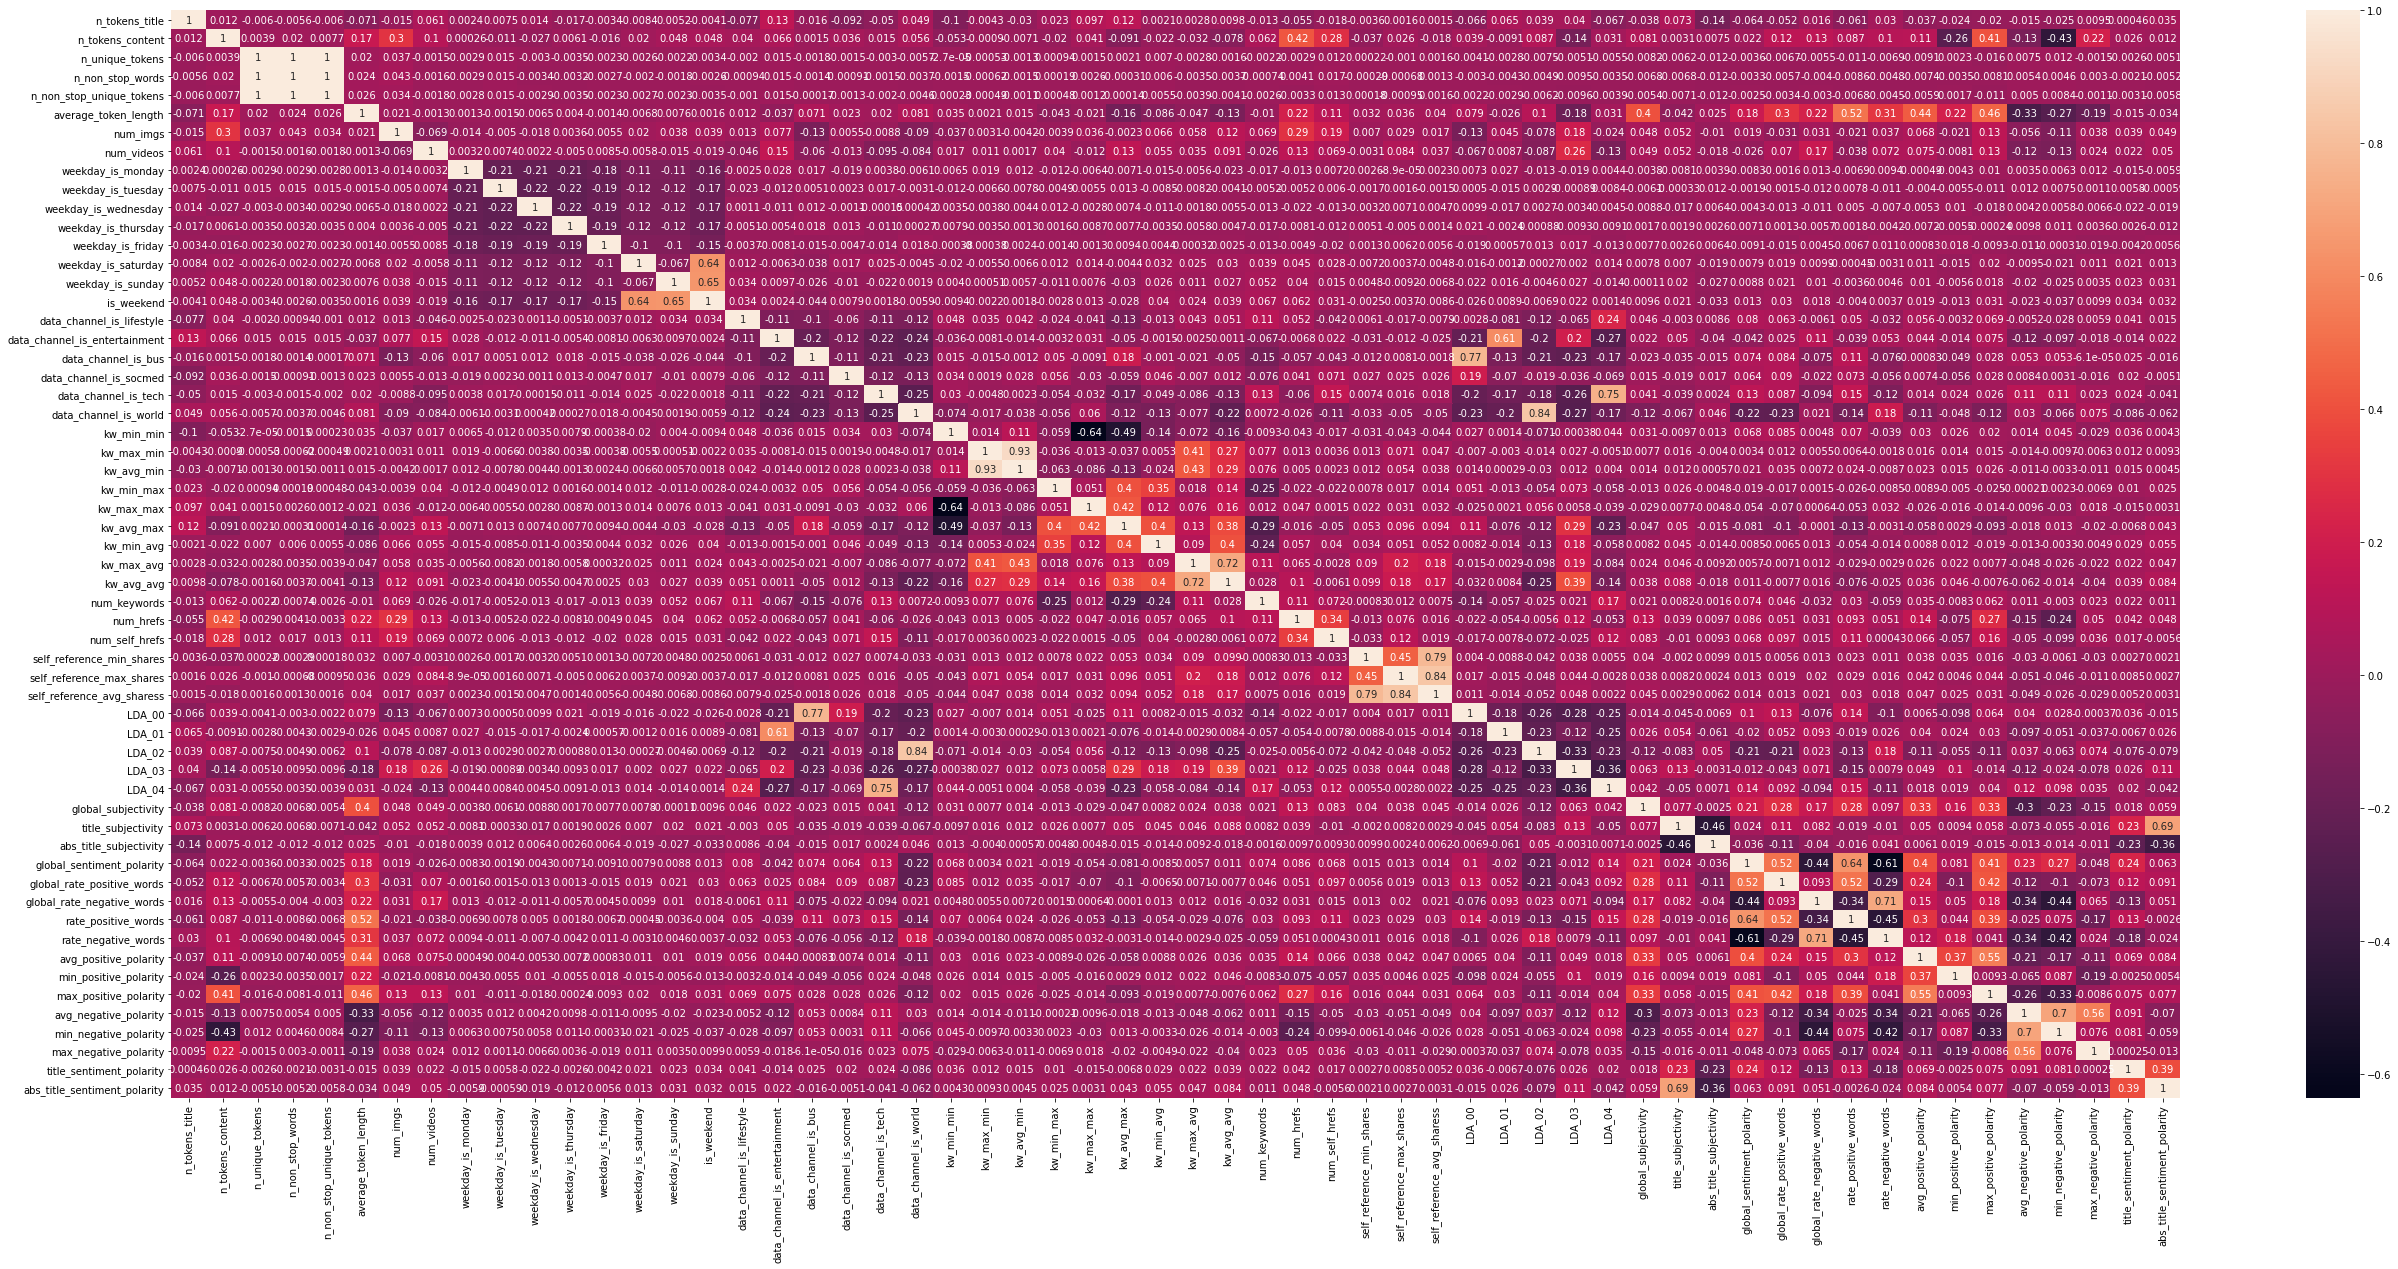

In [240]:
# plotting the feature correlation heatmap
plt.figure(figsize=(45,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

From the above heatMap, we can see that there is less multicollinearity, so we do not drop any columns yet.

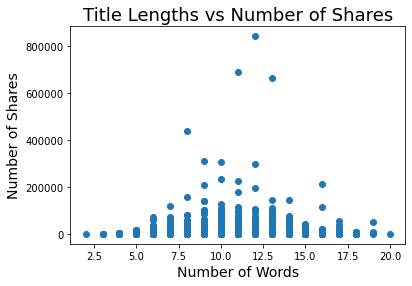

In [241]:
# scatter plot between the number of words in the title and number 
# of shares
plt.scatter(X_train["n_tokens_title"],y_train)
plt.title("Title Lengths vs Number of Shares", size=18)
plt.xlabel("Number of Words", size=14)
plt.ylabel("Number of Shares",size=14)
plt.show()

When The number of words in the title increases initially, then the number of shares increases. However, with the increase in the number of words in the title, the number of shares eventually starts to decrease.

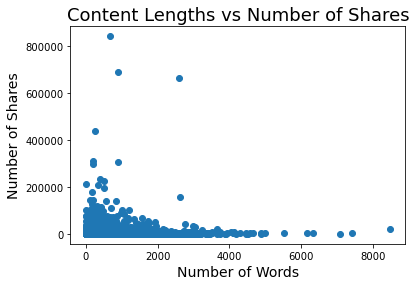

In [242]:
# scatter plot between number of words in the content and number 
# of shares
plt.scatter(X_train["n_tokens_content"],y_train)
plt.title("Content Lengths vs Number of Shares",size=18)
plt.xlabel("Number of Words",size=14)
plt.ylabel("Number of Shares",size=14)
plt.show()

When the number of words in the content increases initially between 0 and 2000, then the number of shares also increases within that range.

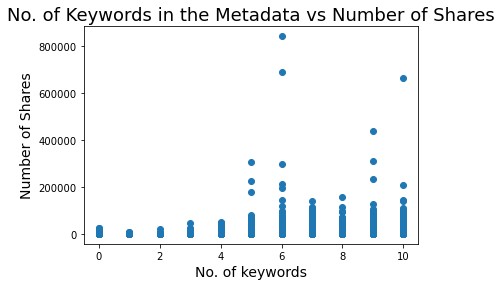

In [243]:
# scatter plot for Number of keywords in the Metadata vs Number 
# of Shares
plt.scatter(X_train["num_keywords"], y_train)
plt.title("No. of Keywords in the Metadata vs Number of Shares", size=18)
plt.xlabel("No. of keywords", size=14)
plt.ylabel("Number of Shares", size=14)
plt.show()

### 5.1 Feature Scaling

We use the Standard Scaler for scaling our features after Looking at the Box Plot.

In [244]:
scale = StandardScaler()
X_train[:] = scale.fit_transform(X_train)

<AxesSubplot:>

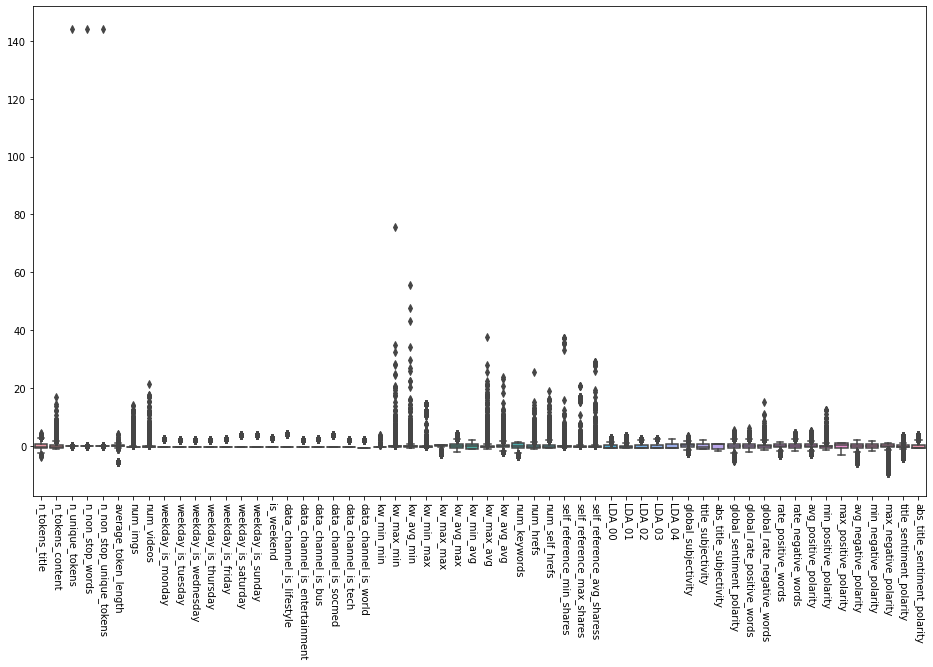

In [245]:
# Let's display a Box Plot after Scaling Our Features
plt.figure(figsize=(16,9))
plt.xticks(rotation=270)
sns.boxplot(data = X_train)

### 5.2 Handling Outliers

Even after scaling the features, there are still a lot of outliers.

In [246]:
# Using k-sigma Method to treat the Outliers.
# Defining a function to handle the Outliers
def treat_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array


In [247]:
# Applying the function on X_train data
X_train = X_train.apply(treat_outliers, axis=0)

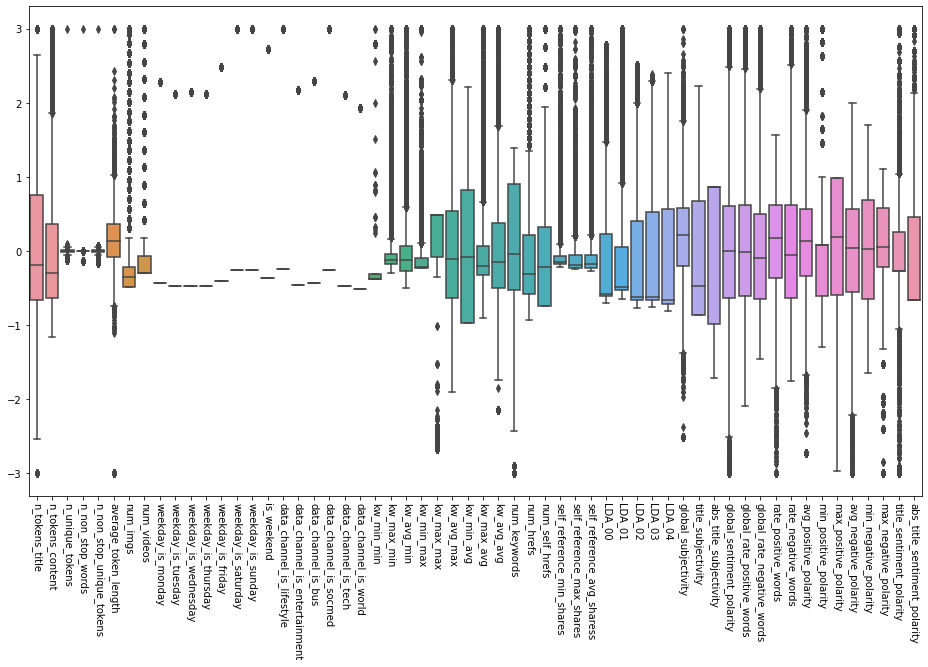

In [248]:
# Checking the Box Plot Again
plt.figure(figsize=(16,9))
plt.xticks(rotation=270)
sns.boxplot(data = X_train)
plt.show()

In [249]:
# Use Square function to Transform multiple columns in dataframe
X_train = X_train[X_train.columns].apply(lambda x: np.square(x))


In [250]:
# Using Cube root to Transform multiple columns in dataframe
# X_train_1 = X_train_1[X_train_1.columns].apply(lambda x: np.cbrt(x))

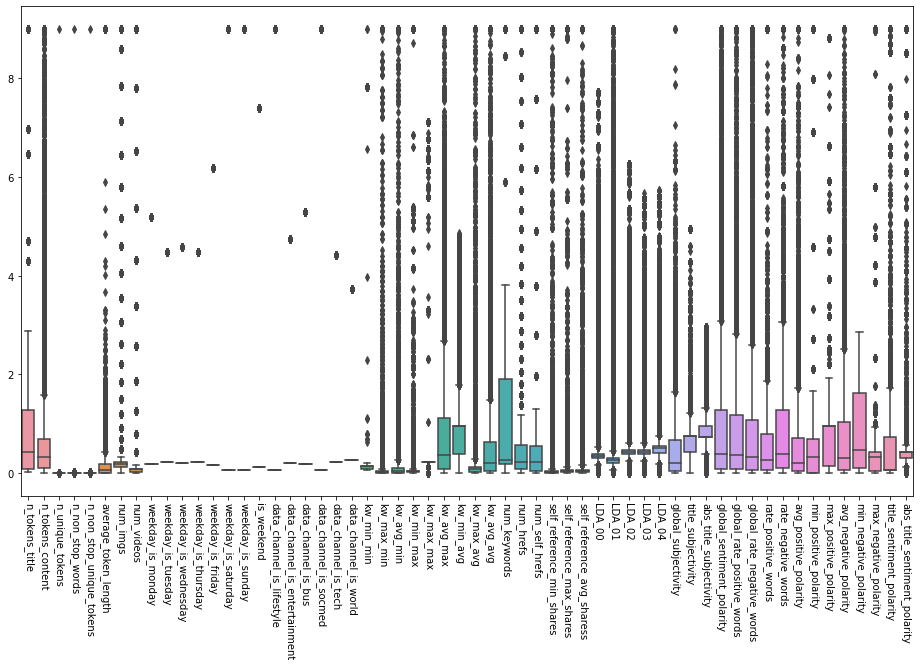

In [251]:
# Checking the Box Plot Again
plt.figure(figsize=(16,9))
plt.xticks(rotation=270)
sns.boxplot(data = X_train)
plt.show()

Let's also plot the correlations for each feature for bivariate Analysis.

<AxesSubplot:>

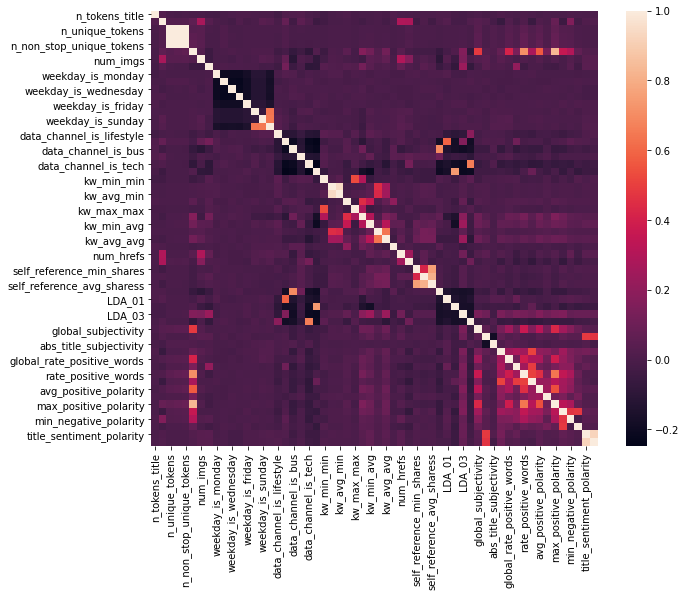

In [252]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_train, columns=X_train.columns).corr())

<AxesSubplot:ylabel='Count'>

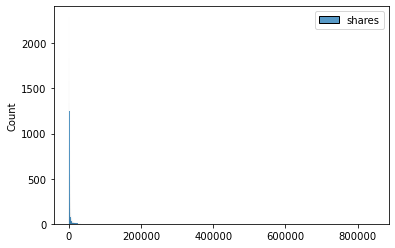

In [253]:
#Distribution for the target variable
sns.histplot(y_train)

<AxesSubplot:ylabel='Count'>

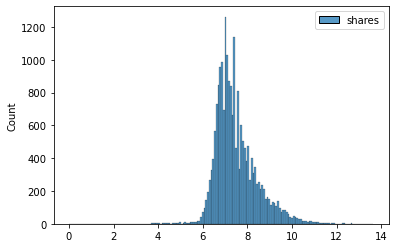

In [254]:
sns.histplot(np.log(y_train))

In [255]:
y_train.isnull().sum()

shares    0
dtype: int64

In [256]:
X_train.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
average_token_length             0
num_imgs                         0
num_videos                       0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday              0
weekday_is_sunday                0
is_weekend                       0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg          

## Step 6: Feature Engineering and Selection

Understanding the feature importances for raw features as well as components to decide top features for modelling.

In [257]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)
rf.fit(X_train, y_train.to_numpy().reshape(-1,))

RandomForestRegressor(n_jobs=-1, random_state=42)

In [258]:
feature_imp = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})

<BarContainer object of 58 artists>

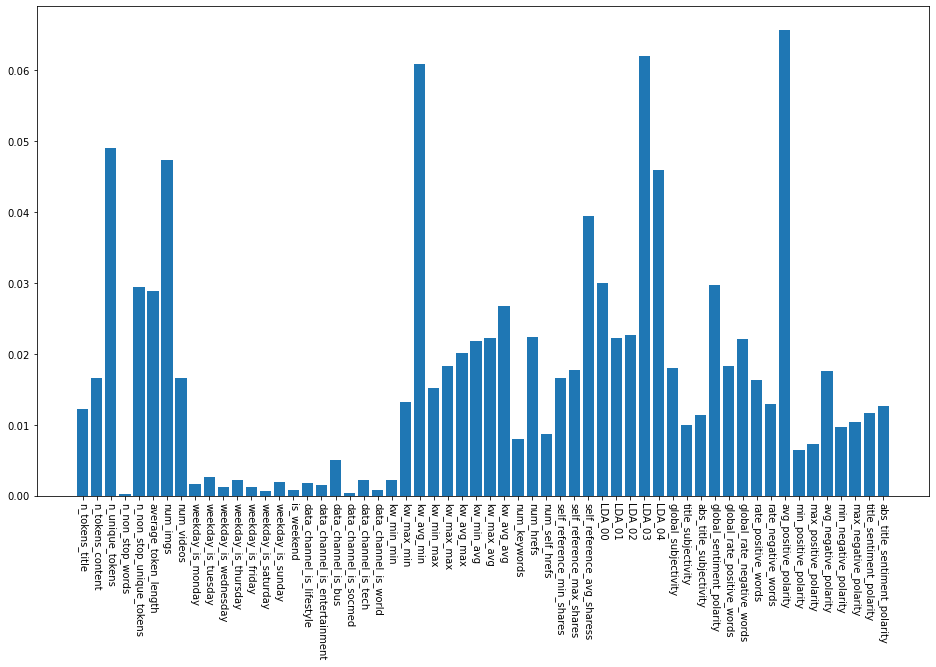

In [259]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=270)
plt.bar(feature_imp['col'], feature_imp['importance'])

In [260]:
# Importing RFE for feature selection 
#where we will choose 15 components
from sklearn.feature_selection import RFE
lr = LinearRegression()

In [261]:
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [262]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 32),
 ('n_tokens_content', False, 14),
 ('n_unique_tokens', True, 1),
 ('n_non_stop_words', True, 1),
 ('n_non_stop_unique_tokens', True, 1),
 ('average_token_length', False, 34),
 ('num_imgs', False, 10),
 ('num_videos', False, 33),
 ('weekday_is_monday', False, 24),
 ('weekday_is_tuesday', False, 35),
 ('weekday_is_wednesday', False, 20),
 ('weekday_is_thursday', False, 29),
 ('weekday_is_friday', False, 36),
 ('weekday_is_saturday', False, 43),
 ('weekday_is_sunday', False, 42),
 ('is_weekend', False, 25),
 ('data_channel_is_lifestyle', True, 1),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', True, 1),
 ('data_channel_is_tech', True, 1),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', False, 40),
 ('kw_max_min', False, 2),
 ('kw_avg_min', True, 1),
 ('kw_min_max', False, 3),
 ('kw_max_max', False, 21),
 ('kw_avg_max', False, 22),
 ('kw_min_avg', True, 1),
 ('kw_max_avg', False, 9),
 ('kw_avg

In [263]:
# The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_avg_min', 'kw_min_avg', 'num_hrefs',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

In [264]:
# We will use the above columns for X Train 
# and create a new DataFrame
X_train_rfe = X_train[col]
X_train_rfe.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_avg_min,kw_min_avg,num_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
id,,,,,,,,,,,,,,,
4585,5.350931e-04,0.000007,5.292444e-04,0.056927,0.211326,5.278431,0.06357,0.226531,0.267848,0.013261,0.046385,0.098615,0.008410,0.020628,0.018607
13413,8.695939e-04,0.000007,3.617318e-04,0.056927,0.211326,5.278431,0.06357,0.226531,0.267848,0.122422,0.952718,0.051349,0.031067,0.052972,0.059179
9073,2.489836e-04,0.000007,7.701646e-05,0.056927,4.732030,0.189450,0.06357,0.226531,0.267848,0.027667,0.077838,0.332136,0.015650,1.861716,1.518646
28754,8.461952e-04,0.000007,3.491109e-04,0.056927,4.732030,0.189450,0.06357,0.226531,0.267848,0.068969,2.064590,0.044325,0.000127,0.020628,0.009209
21620,5.515612e-09,0.000007,5.092645e-07,0.056927,0.211326,0.189450,0.06357,0.226531,3.733455,0.075535,0.952718,0.239009,0.010516,0.035585,0.032034


In [265]:
# We will use the above columns for X Test 
# and create a new DataFrame
X_test_rfe = X_test[col]
X_test_rfe.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_avg_min,kw_min_avg,num_hrefs,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
id,,,,,,,,,,,,,,,
17455,0.529976,1.0,0.617021,0.0,0.0,0.0,1.0,0.0,0.0,109.200000,0.000000,13.0,4000.0,11800.0,7900.00
25193,0.567742,1.0,0.738035,0.0,0.0,0.0,0.0,0.0,1.0,131.750000,0.000000,7.0,2500.0,2500.0,2500.00
13154,0.474198,1.0,0.661176,0.0,0.0,0.0,0.0,0.0,1.0,49.500000,1364.874459,9.0,471.0,1600.0,978.75
6712,0.653061,1.0,0.765517,0.0,0.0,0.0,0.0,1.0,0.0,377.833333,0.000000,4.0,0.0,0.0,0.00
29548,0.551780,1.0,0.733154,0.0,0.0,1.0,0.0,0.0,0.0,698.897500,0.000000,8.0,818.0,27200.0,8179.50


In [266]:
# Now is the time to apply PCA with the selected columns data frame
pca = PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[-1.21704776e+00, -1.98317321e+00,  3.81225310e+00, ...,
         6.49793382e-04, -6.97055766e-05,  1.31796938e-04],
       [-1.17530913e+00, -1.94484777e+00,  3.83784127e+00, ...,
        -2.64423116e-06,  3.84796437e-04,  1.83153828e-04],
       [-4.90561566e-01, -3.84128336e-01, -2.29442469e+00, ...,
        -4.68061259e-03,  2.37450407e-04, -2.94197454e-04],
       ...,
       [-4.12669625e-01, -2.39212218e-01, -1.14966996e+00, ...,
        -7.34180773e-05,  1.39215750e-04,  6.33312424e-04],
       [-3.91493072e-01, -2.38856763e-01, -6.05513872e-01, ...,
         7.57229416e-05,  1.40015921e-05,  5.44397226e-04],
       [-4.12040643e-01, -2.59291611e-01, -5.88650022e-01, ...,
        -1.06826004e-03,  2.27317472e-04, -2.49170931e-04]])

In [267]:
# Set of all eigen vectors for each principal component
pca.components_

array([[-4.55494550e-05, -6.97064413e-05, -5.97089699e-05,
        -1.26384938e-01, -8.69763165e-02, -1.95066894e-01,
         9.59374137e-01, -7.64198386e-02, -5.32925103e-02,
         4.79418927e-03,  4.52028709e-02,  6.26297071e-02,
         3.32122272e-02,  3.08305682e-02,  3.59124657e-02],
       [-3.07200584e-05, -3.38729012e-05, -2.80468106e-05,
         9.23989827e-01, -5.71863001e-02, -3.62436828e-01,
         2.99548299e-02, -5.45295821e-02, -3.36694977e-02,
         2.17639579e-02,  4.27914985e-02,  6.45220846e-02,
         1.09059773e-02, -3.91239272e-03,  2.35350153e-03],
       [-3.21507222e-04, -3.38070063e-04, -3.91087542e-04,
         2.61513427e-01, -4.72629810e-01,  7.89796348e-01,
         1.28552372e-01, -2.25557902e-01, -1.11762134e-01,
         8.57504617e-04,  2.33089464e-02, -5.46578314e-02,
         1.78367680e-02,  1.55253034e-02,  2.16699763e-02],
       [ 4.12672427e-04,  4.26335488e-04,  4.46589678e-04,
         6.08600349e-02,  6.93802291e-01,  1.85838171

In [268]:
# explains the variance or information about 
# each principal components
pca.explained_variance_ratio_

array([1.79683900e-01, 1.63128478e-01, 1.49193137e-01, 1.30190268e-01,
       1.07379478e-01, 8.46611873e-02, 8.10933324e-02, 3.54929681e-02,
       3.03581332e-02, 1.96959548e-02, 1.59143193e-02, 2.76384395e-03,
       4.44916556e-04, 6.90455312e-08, 1.44624714e-08])

<BarContainer object of 15 artists>

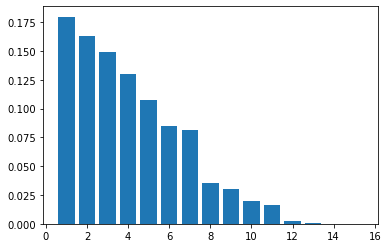

In [269]:

# Displaying Bar Plot for explained variance ratio for 15 components
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [270]:
# variance cumulative
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.1796839 , 0.34281238, 0.49200552, 0.62219578, 0.72957526,
       0.81423645, 0.89532978, 0.93082275, 0.96118088, 0.98087684,
       0.99679116, 0.999555  , 0.99999992, 0.99999999, 1.        ])

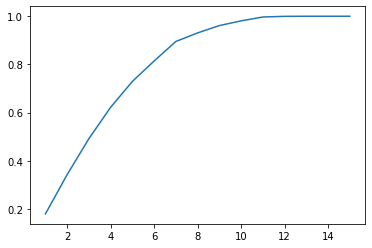

In [271]:
# Creating a Scree Plot X-axis:Number of components
# and Y-axis: Total Variance Explained
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),var_cumu)

from the Above Scree plot, we just need to retain the first 7 Principal Components that provide total variance or maximum information about the data set.

In [272]:
# Now Let's see the two components of PCA
components_2 = pd.DataFrame({'PC1':pca.components_[0]
                            ,'PC2':pca.components_[1]
                            ,'Feature':X_train_rfe.columns})
components_2

,PC1,PC2,Feature
0,-0.000046,-0.000031,n_unique_tokens
1,-0.000070,-0.000034,n_non_stop_words
2,-0.000060,-0.000028,n_non_stop_unique_tokens
3,-0.126385,0.923990,data_channel_is_lifestyle
4,-0.086976,-0.057186,data_channel_is_entertainment
5,-0.195067,-0.362437,data_channel_is_bus
6,0.959374,0.029955,data_channel_is_socmed
7,-0.076420,-0.054530,data_channel_is_tech
8,-0.053293,-0.033669,data_channel_is_world
9,0.004794,0.021764,kw_avg_min


In [273]:
#creating a dataframe for PCA on selected RFE columns
cols = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],
                       'Features':cols})

In [274]:
# Creating a new data frame on 8 features for Train data
X_train_pca = X_train_rfe[pca_df.Features[:8]]
X_train_pca.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech
id,,,,,,,,
4585,5.350931e-04,0.000007,5.292444e-04,0.056927,0.211326,5.278431,0.06357,0.226531
13413,8.695939e-04,0.000007,3.617318e-04,0.056927,0.211326,5.278431,0.06357,0.226531
9073,2.489836e-04,0.000007,7.701646e-05,0.056927,4.732030,0.189450,0.06357,0.226531
28754,8.461952e-04,0.000007,3.491109e-04,0.056927,4.732030,0.189450,0.06357,0.226531
21620,5.515612e-09,0.000007,5.092645e-07,0.056927,0.211326,0.189450,0.06357,0.226531


In [275]:
# Creating a new data frame on 8 features for Test data
X_test_pca = X_test_rfe[pca_df.Features[:8]]
X_test_pca.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech
id,,,,,,,,
17455,0.529976,1.0,0.617021,0.0,0.0,0.0,1.0,0.0
25193,0.567742,1.0,0.738035,0.0,0.0,0.0,0.0,0.0
13154,0.474198,1.0,0.661176,0.0,0.0,0.0,0.0,0.0
6712,0.653061,1.0,0.765517,0.0,0.0,0.0,0.0,1.0
29548,0.551780,1.0,0.733154,0.0,0.0,1.0,0.0,0.0


In [276]:
X_train_pca.shape

(20813, 8)

In [277]:
X_test_pca.shape

(8920, 8)

In [278]:
# now doing final PCA with 8 components

pca_final = IncrementalPCA(n_components=8)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(20813, 8)

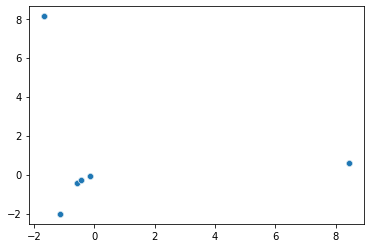

In [279]:
# Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

In [280]:
X_test_pca.tail()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech
id,,,,,,,,
18779,0.449505,1.0,0.605634,0.0,0.0,0.0,0.0,1.0
9897,0.571812,1.0,0.773707,0.0,0.0,0.0,0.0,0.0
14637,0.679389,1.0,0.851351,0.0,0.0,0.0,1.0,0.0
18371,0.668478,1.0,0.815789,0.0,0.0,0.0,0.0,0.0
16437,0.515358,1.0,0.680556,0.0,0.0,0.0,0.0,0.0


In [281]:
np.isnan(X_test_pca.any())

n_unique_tokens                  False
n_non_stop_words                 False
n_non_stop_unique_tokens         False
data_channel_is_lifestyle        False
data_channel_is_entertainment    False
data_channel_is_bus              False
data_channel_is_socmed           False
data_channel_is_tech             False
dtype: bool

In [282]:
np.isfinite(X_test_pca.all())

n_unique_tokens                  True
n_non_stop_words                 True
n_non_stop_unique_tokens         True
data_channel_is_lifestyle        True
data_channel_is_entertainment    True
data_channel_is_bus              True
data_channel_is_socmed           True
data_channel_is_tech             True
dtype: bool

In [283]:
np.any(np.isnan(X_test_pca))

False

In [284]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(8920, 8)

## Step 7: Model Building

In [285]:
# created a function to get all the valuable metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### 7.1 Linear Regression

In [286]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(y_test.values.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0016
r2:  0.0016
MAE:  3300.2134
MSE:  159672705.8115
RMSE:  12636.1666

Test metrics
explained_variance:  -16.5265
r2:  -151.0473
MAE:  129229.2094
MSE:  18845532766.0242
RMSE:  137279.0325


### 7.2 Ridge Regression

In [287]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [289]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, y_train)
print(ridge.coef_)

[[  32.31401368   35.09492316    9.58008993   43.28777187 -273.40089734
    53.2744194    -4.37456767   -4.04914444]]


In [290]:
# predict it now...
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(y_test.values.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0008
r2:  0.0008
MAE:  3305.2327
MSE:  159794614.5732
RMSE:  12640.9895

Test metrics
explained_variance:  0.0004
r2:  -0.0026
MAE:  3566.2546
MSE:  124265272.7507
RMSE:  11147.4335


### 7.3 Lasso Regression 

In [291]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [292]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.9}


In [293]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised

alpha =0.9
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, y_train) 

Lasso(alpha=0.9)

In [294]:
lasso.coef_

array([  32.45295908,   35.27897362,    9.46727415,   43.63566458,
       -282.40272353,  195.09291304,   -0.        ,   -0.        ])

In [295]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(y_train.values.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(y_test.values.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0008
r2:  0.0008
MAE:  3305.2431
MSE:  159793999.2923
RMSE:  12640.9651

Test metrics
explained_variance:  0.0003
r2:  -0.0049
MAE:  3698.6676
MSE:  124558713.074
RMSE:  11160.5875


## Step 8: Creating Submission file

In [296]:
# Checking the test data
news_test.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


In [297]:
submission_data = news_test.set_index('id')[X_train_pca.columns]
submission_data.shape

(9911, 8)

In [298]:
missing_data_percent1=round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)
missing_data_percent1

n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
dtype: float64

In [299]:
# Imputing the missing values in the 'X_test' data set with median
#imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
#submission_data_1 = pd.DataFrame(imp_median.fit_transform(submission_data),columns=submission_data.columns)
#submission_data_1

In [300]:
submission_data = pca_final.transform(submission_data)
submission_data.shape

(9911, 8)

In [301]:
# We ll go for Lasso regression as it has the lowest RMSE
news_test["Shares"] = ridge.predict(submission_data)
output = news_test[['id','Shares']]
output.head()

,id,Shares
0,29733,4055.425610
1,29734,3907.153421
2,29735,3871.871051
3,29736,3865.103158
4,29737,4053.327318


In [302]:
output.to_csv('submission_regression_pca_ridge_lasso_lr_New.csv',index=False)

### Business Suggestions

The News company needs to focus on different mediums where the spread of news is happening the most and they should get their predictions from social media and lifestyle data channels as these sources are the direct indicators of how the consumers deal with the news.